# Introduction

This project will show the analysis of species in the National Park Service and if there are patterns to them becoming endangered.

This project will focus on the analysis, clean up and plotting of data.


# Goals

The Goals for this project will be:
* What are the distribution of conservation status for animals?
* Are certain types of animals more inclined to be endangered?
    * What animals are they?
* Which species are most seen at different parks?


# Species
Lets see what is in the species data and do some analysis on it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species_df = pd.read_csv('species_info.csv')

species_df.head()



,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [2]:
print(species_df.dtypes)
print(species_df.columns)


category               object
scientific_name        object
common_names           object
conservation_status    object
dtype: object
Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')


## How many animals there are?

In [3]:
print(species_df.scientific_name.nunique())

5541


## What are the categories these species are from?

In [4]:
print(species_df.category.unique())

['Mammal' 'Bird' 'Reptile' 'Amphibian' 'Fish' 'Vascular Plant'
 'Nonvascular Plant']


## What are the types of conversation status?

In [5]:
print(species_df.conservation_status.unique())

[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']


## Show the counted values of each of the types of conservation status.

In [7]:
species_df.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10


We currently see all the data that the conservation status has except the "nan" row. We will change it so that the "nan" row will be a different name and show up when we use groupby.
Then we will re-run the same code to see how many species are "Unthreated".

In [9]:
species_df.fillna('Unthreatened', inplace=True)
species_df.groupby('conservation_status').scientific_name.nunique().reset_index()

,conservation_status,scientific_name
0,Endangered,15
1,In Recovery,4
2,Species of Concern,151
3,Threatened,10
4,Unthreatened,5363


We can see that a majority of the species are considered Unthreatened.

Now lets create a bar graph.

In [14]:
amount_protected = species_df.groupby('conservation_status').scientific_name.nunique().reset_index().sort_values(by='scientific_name')

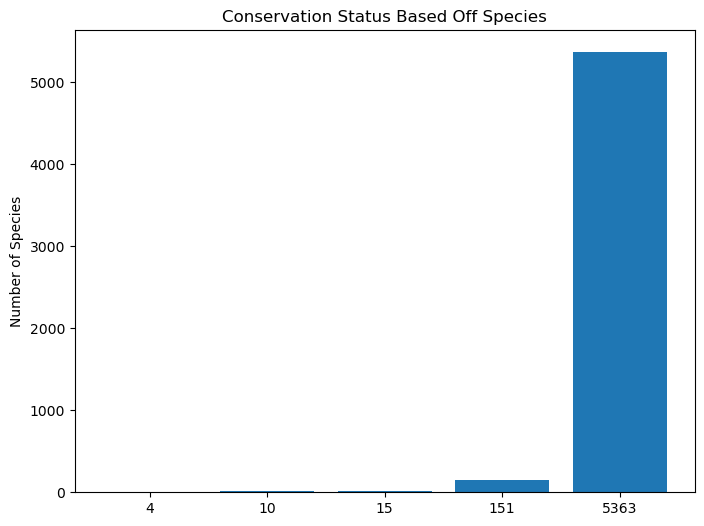

In [21]:
plt.figure(figsize=(8,6))
ax = plt.subplot()
plt.bar(range(len(amount_protected)), amount_protected.scientific_name.values)
ax.set_xticks(range(len(amount_protected)))
ax.set_xticklabels(amount_protected.scientific_name)
plt.ylabel('Number of Species')
plt.title('Conservation Status Based Off Species')
plt.show()

Are certain types of animals more inclined to be endangered and What animals are they?

In [47]:
species_df['protected'] = species_df.conservation_status != 'Unthreatened'

In [48]:
category_counts = species_df.groupby(['category', 'protected']).scientific_name.nunique().reset_index()
category_counts.head()

,category,protected,scientific_name
0,Amphibian,False,72
1,Amphibian,True,7
2,Bird,False,413
3,Bird,True,75
4,Fish,False,115


In [63]:
category_pivots = category_counts.pivot(columns='protected',
                                          index='category',
                                          values='scientific_name').reset_index()
category_pivots.columns = ['category','unprotected','protected']
category_pivots

,category,unprotected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [62]:
category_pivots['percent_protected'] = category_pivots.protected / (category_pivots.protected + category_pivots.unprotected)*100
category_pivots

,category,unprotected,protected,percent_protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


We can see that Mammals and Birds are the two species that need the most protecting at around 17% and 15% respectfully.
By using chi2 contigency we can tell how much of difference the species have, using a p-value of 0.05.

In [69]:
from scipy.stats import chi2_contingency 

contingency = [[30,146],
               [75,413]]
chi2_contingency(contingency)

Chi2ContingencyResult(statistic=0.1617014831654557, pvalue=0.6875948096661336, dof=1, expected_freq=array([[ 27.8313253, 148.1686747],
       [ 77.1686747, 410.8313253]]))


By using chi2 contingency we can tell there isn't much of siginificant difference between Mammals and Birds

Let's try using Mammals and Reptiles

In [71]:
contingency2 = [[30,146],
                [5,73]]
chi2_contingency(contingency2)

Chi2ContingencyResult(statistic=4.289183096203645, pvalue=0.03835559022969898, dof=1, expected_freq=array([[ 24.2519685, 151.7480315],
       [ 10.7480315,  67.2519685]]))

We can see that the p-value is 0.03 which is less than 0.05 threshold so there is a significiant difference between Mammals and Reptiles.

# Observations

Load in the observation data and do some small analysis on it.

In [29]:
observation_df = pd.read_csv('observations.csv')
observation_df.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [27]:
print(observation_df.dtypes)
print(observation_df.columns)

scientific_name    object
park_name          object
observations        int64
dtype: object
Index(['scientific_name', 'park_name', 'observations'], dtype='object')


## Lets see the different types of parks

In [31]:
print(observation_df.park_name.unique())

['Great Smoky Mountains National Park' 'Yosemite National Park'
 'Bryce National Park' 'Yellowstone National Park']


## What are the 

In [32]:
observation_df.observations

0         68
1         77
2        138
3         84
4         85
        ... 
23291    173
23292    130
23293    140
23294    171
23295    164
Name: observations, Length: 23296, dtype: int64